<a href="https://colab.research.google.com/github/AEYSHA-AZAM/Data-Zenix-Project-7./blob/main/Fraud_Detection_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [43]:
from sklearn.datasets import make_classification

# 5000 samples, 20 features, 2 classes (fraud or not)
X, y = make_classification(n_samples=5000, n_features=20,
                           n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.95, 0.05],
                           flip_y=0.01, random_state=42)

# Convert to DataFrame
feature_names = [f'Feature_{i}' for i in range(1, 21)]
df = pd.DataFrame(X, columns=feature_names)
df['Is_Fraud'] = y
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Is_Fraud
0,2.944165,-0.998592,3.391353,0.618693,1.258639,-3.069388,0.240765,-3.791229,-1.142619,-4.168804,...,7.022407,-2.234347,0.053088,0.431743,-0.310663,0.024758,1.106598,-1.875442,0.501177,0
1,2.046693,-0.558790,-3.792853,1.495057,2.733506,-1.357118,-0.375251,-0.866298,0.186564,-0.435952,...,0.301873,0.564880,1.393341,3.055217,-0.418378,0.175254,0.510822,0.135335,0.167534,0
2,2.752162,-0.557165,1.515757,1.166880,-2.615778,-2.953125,-1.038739,-0.559067,3.279708,-2.513502,...,1.824009,-2.178617,1.936264,0.818369,-1.070649,1.121339,-1.269495,-1.836434,0.995774,0
3,3.758842,1.774063,-7.835727,0.995192,0.914889,-0.559227,2.296540,-3.388484,-4.871770,-1.463944,...,2.469748,0.194452,0.329122,5.334520,-0.976299,0.315335,2.573379,3.092408,-1.960234,0
4,-9.402973,-0.422872,7.830607,2.970175,-0.443741,2.900363,-3.209576,-2.758786,-6.001960,-2.218654,...,-3.388729,2.499188,-2.227852,-4.432212,-0.389933,0.270719,0.425519,0.745785,1.675062,0


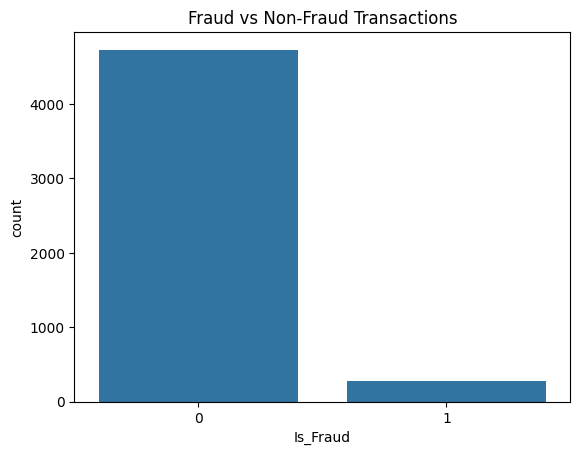

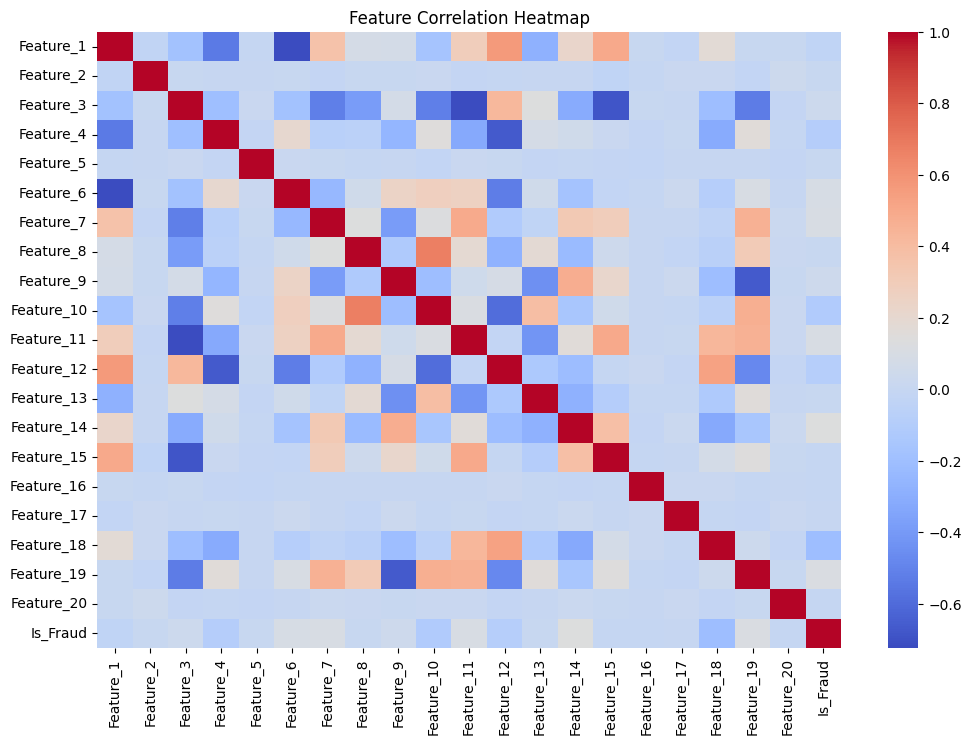

In [44]:
# Check class distribution
sns.countplot(x='Is_Fraud', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [45]:
X = df.drop('Is_Fraud', axis=1)
y = df['Is_Fraud']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
log_preds = logreg.predict(X_test_scaled)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print(classification_report(y_test, log_preds))


🔹 Logistic Regression Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       945
           1       0.86      0.33      0.47        55

    accuracy                           0.96      1000
   macro avg       0.91      0.66      0.73      1000
weighted avg       0.96      0.96      0.95      1000



In [47]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train_scaled, y_train)
dt_preds = dtree.predict(X_test_scaled)

print("🔹 Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))


🔹 Decision Tree Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       945
           1       0.86      0.33      0.47        55

    accuracy                           0.96      1000
   macro avg       0.91      0.66      0.73      1000
weighted avg       0.96      0.96      0.95      1000



In [48]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp_preds = mlp.predict(X_test_scaled)

print("🔹 Neural Network Accuracy:", accuracy_score(y_test, mlp_preds))
print(classification_report(y_test, mlp_preds))


🔹 Neural Network Accuracy: 0.974
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       945
           1       0.85      0.64      0.73        55

    accuracy                           0.97      1000
   macro avg       0.92      0.82      0.86      1000
weighted avg       0.97      0.97      0.97      1000



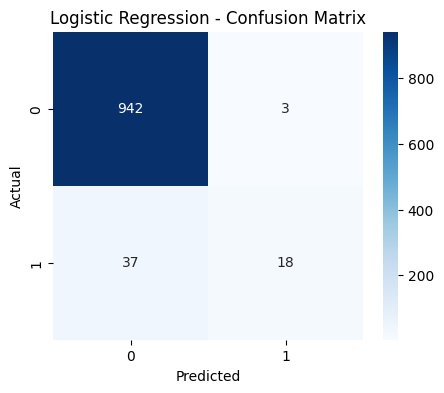

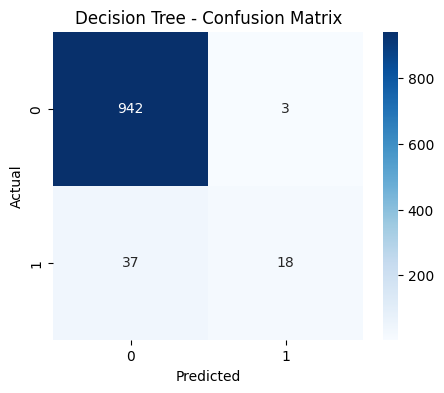

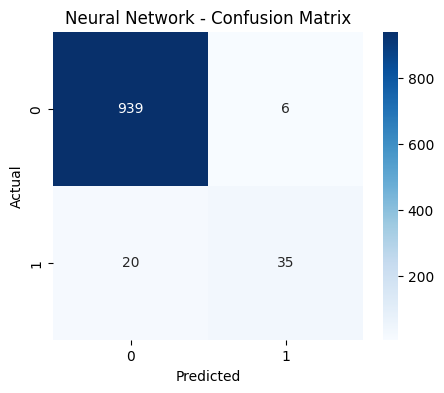

In [49]:
models = {
    'Logistic Regression': log_preds,
    'Decision Tree': dt_preds,
    'Neural Network': mlp_preds
}

for name, preds in models.items():
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [50]:
print("📊 Final Accuracy Summary:")
for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    print(f"{name}: {acc:.4f}")


📊 Final Accuracy Summary:
Logistic Regression: 0.9600
Decision Tree: 0.9600
Neural Network: 0.9740
